In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set(style="darkgrid")
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Input Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/creditcard.csv')


### EDA

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print('Fraud classes Fraction: {}'.format(outlier_fraction))

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Fraud classes Fraction: 0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
# Code : Print the amount details for Fraudulent Transaction

print("Amount details of the fraudulent transaction")
Fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("Amount details of the valid transaction")
Valid.Amount.describe()

Amount details of the valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


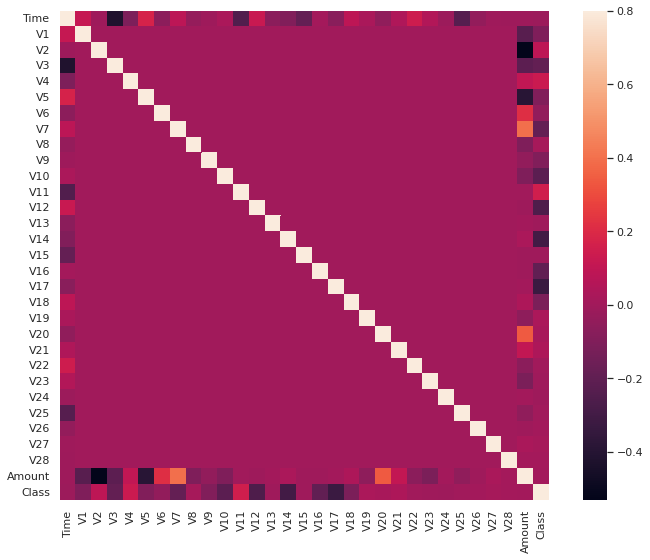

In [ ]:
# Correlation matrix
corrmatrix = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmatrix, vmax = .8, square = True)
plt.show()

Text(0, 0.5, 'Amount')

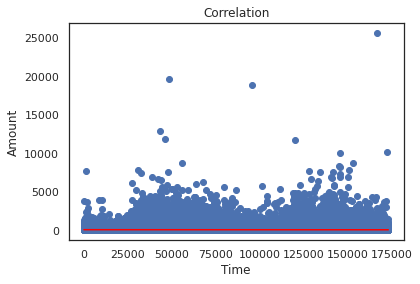

In [ ]:
#Correlation between Transaction in time and Transaction amount
y=df['Amount']
x=df['Time']
corr = y.corr(x)
plt.title('Correlation')

# plot the data
plt.scatter(x, y)
 
# fits the best fitting line to the data
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
 
# Labelling axes
plt.xlabel('Time')
plt.ylabel('Amount')

In [ ]:
import plotly.graph_objects as go

labels=['0', '1']
values= [len(df['Class'].loc[df['Class'] == 0]), len(df['Class'].loc[df['Class'] == 1])]
colors = ['#0037FF', '#FF0000']

fig = go.Figure(data=[go.Pie(
    labels=labels, title="Class",
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=2))
)])
fig.show()

0    284315
1       492
Name: Class, dtype: int64


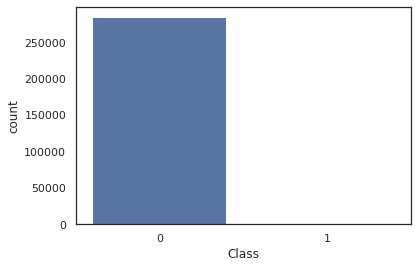

In [ ]:
#The goal of the problem is to be able to distinguish between the Target Class (0 or 1)
target = 'Class'
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

In [ ]:
#There is a large imbalance of data. There are few fraudulent entries. 
#Therefore there is a large imbalance between positive and fraudulent transactions. 
#In order to solve it, I will use the SMOTE technique - Synthetic Minority Oversampling Technique

### Oversampling Using SMOTE

In [ ]:
percentage_P_Tr = 100*(284315/float(df.shape[0]))
percentage_P_Tr

99.82725143693798

In [ ]:
percentage_F_Tr = 100*(492/float(df.shape[0]))
percentage_F_Tr

0.1727485630620034

In [ ]:
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_overSamp, y_overSamp = oversample.fit_resample(X, y)

0    284315
1    284315
Name: Class, dtype: int64


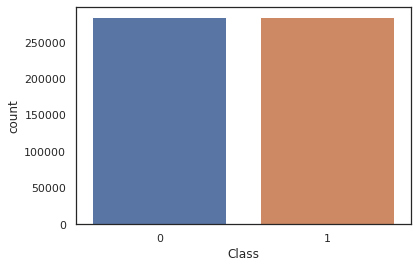

In [ ]:
ax = sns.countplot(x=target,data=y_overSamp)
print(y_overSamp[target].value_counts())

### Data Preparation

### Locate Missing Data

In [ ]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Check for duplicates

In [ ]:
dup = df[df.duplicated()]
print("Number of duplicated records total:", len(dup))
print("Number of duplicated records in Fraud cases:", len(dup[dup["Class"]==1]))
print("Number of duplicated records in Valid cases:", len(dup[dup["Class"]==0]))

Number of duplicated records total: 1081
Number of duplicated records in Fraud cases: 19
Number of duplicated records in Valid cases: 1062


In [ ]:
total = len(df)
df.drop_duplicates(inplace=True)
print(total - len(df), " duplicated records removed")
print("Total records left:", len(df))

1081  duplicated records removed
Total records left: 283726


In [ ]:
#Fraud and Non-Fraud count after removing duplicates
class_names = {0:'Valid', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Valid    283253
Fraud       473
Name: Class, dtype: int64


### Model Training

### Logistic Regression Model

In [ ]:
from pathlib import Path

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm

from mord import LogisticIT

from dmba import classificationSummary, gainsChart, liftChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score



no display found. Using non-interactive Agg backend


In [ ]:
# Create predictors X and outcome y variables.
X = df.drop(columns=['Class'])
y = df['Class']


# Partition data into training (70% or 0.7) and validation(30% or 0.3)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.3, random_state=1)
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -1.576
Coefficients for Predictors
        Time     V1     V2     V3     V4    V5    V6     V7     V8     V9  \
Coeff:  -0.0  0.299 -0.448 -0.808  0.119  0.03 -0.05  0.284 -0.354 -0.383   

        ...    V20    V21    V22    V23    V24    V25    V26   V27    V28  \
Coeff:  ...  0.091  0.237  0.331  0.052 -0.018 -0.343  0.053 -0.08  0.022   

        Amount  
Coeff:  -0.005  

[1 rows x 30 columns]


In [ ]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
        Actual  Classification    p(0)    p(1)
33560        0               0  0.9998  0.0002
57869        0               0  0.9965  0.0035
187479       0               0  1.0000  0.0000
243555       0               0  1.0000  0.0000
96229        0               0  1.0000  0.0000
71364        0               0  0.9978  0.0022
39103        0               0  0.9931  0.0069
216874       0               0  1.0000  0.0000
130960       0               0  0.9999  0.0001
262914       0               0  1.0000  0.0000
237667       0               0  1.0000  0.0000
90949        0               0  0.9987  0.0013
168298       0               0  1.0000  0.0000
148458       0               0  0.9996  0.0004
33461        0               0  0.9919  0.0081
130521       0               0  0.9999  0.0001
2172         0               0  0.9455  0.0545
194000       0               0  0.9999  0.0001
4182         0               0  0.9917  0.0083
153892       0      

In [ ]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))
 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9990)

       Prediction
Actual      0      1
     0 198200     60
     1    133    215

Validation Partition
Confusion Matrix (Accuracy 0.9991)

       Prediction
Actual     0     1
     0 84975    18
     1    61    64


In [ ]:
print("The accuracy is", accuracy_score(valid_y, log_pred)) 
print("The precision is", precision_score(valid_y, log_pred))
print("The recall is", recall_score(valid_y, log_pred))
print("The F1 score is", f1_score(valid_y, log_pred))

The accuracy is 0.999071876688832
The precision is 0.7804878048780488
The recall is 0.512
The F1 score is 0.6183574879227053


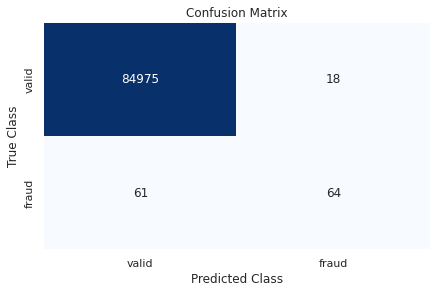

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = ['valid', 'fraud']
matrix = confusion_matrix(valid_y, log_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Random Forest

In [ ]:
#Fit and predict
randomForest = RandomForestClassifier() 
randomForest.fit(train_X, train_y) 
random_pred = randomForest.predict(valid_X)

  
print("The accuracy is", accuracy_score(valid_y, random_pred)) 
print("The precision is", precision_score(valid_y, random_pred))
print("The recall is", recall_score(valid_y, random_pred))
print("The F1 score is", f1_score(valid_y, random_pred))

The accuracy is 0.999530064146244
The precision is 0.956989247311828
The recall is 0.712
The F1 score is 0.81651376146789


In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(valid_y, random_pred)

array([[84989,     4],
       [   35,    90]])

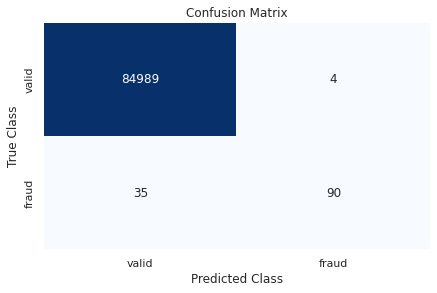

In [ ]:
class_names = ['valid', 'fraud']
matrix = confusion_matrix(valid_y, random_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### XGBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(train_X , train_y)

XGBClassifier()

In [ ]:
xgb_preds=xgb.predict(valid_X)
confusion_matrix(valid_y,xgb_preds)

array([[84985,     8],
       [   33,    92]])

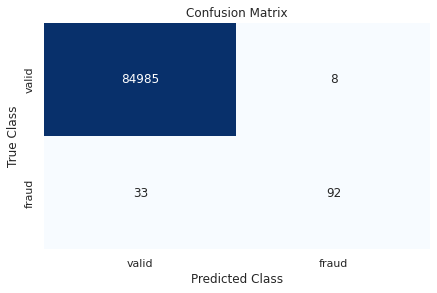

In [ ]:
class_names = ['valid', 'fraud']
matrix = confusion_matrix(valid_y, xgb_preds)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("The accuracy is", accuracy_score(valid_y, xgb_preds)) 
print("The precision is", precision_score(valid_y, xgb_preds))
print("The recall is", recall_score(valid_y, xgb_preds))
print("The F1 score is", f1_score(valid_y, xgb_preds))

The accuracy is 0.9995183157499001
The precision is 0.92
The recall is 0.736
The F1 score is 0.8177777777777778


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_pred=knn.predict(valid_X)
confusion_matrix(valid_y,knn_pred)

array([[84993,     0],
       [  124,     1]])

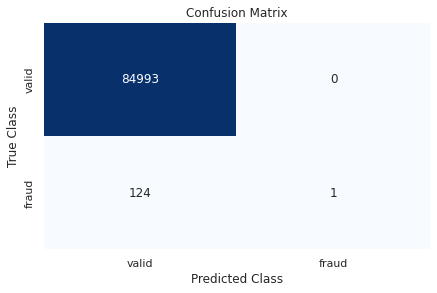

In [ ]:
class_names = ['valid', 'fraud']
matrix = confusion_matrix(valid_y, knn_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("The accuracy is", accuracy_score(valid_y, knn_pred)) 
print("The precision is", precision_score(valid_y, knn_pred))
print("The recall is", recall_score(valid_y, knn_pred))
print("The F1 score is", f1_score(valid_y, knn_pred))

The accuracy is 0.9985431988533565
The precision is 1.0
The recall is 0.008
The F1 score is 0.015873015873015872


### Artificial Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_test = sc.transform(valid_X)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initializing the ANN
model = Sequential()

In [ ]:
# Adding the input layer and first Hidden Layer
model.add(Dense(activation = "relu", input_dim = 30, units = 6, kernel_initializer='uniform' ))

# Adding the Second hidden layer
model.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

# Adding the third hidden layer
model.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
model.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 186       
                                                                 
 dense_1 (Dense)             (None, 20)                140       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# Fitting the ANN to the training set
model.fit(train_X, train_y, batch_size = 100, epochs =10)

Epoch 1/10
1987/1987 [==============================] - 14s 6ms/step - loss: 0.0389 - accuracy: 0.9948
Epoch 2/10
1987/1987 [==============================] - 9s 5ms/step - loss: 0.0205 - accuracy: 0.9982
Epoch 3/10
1987/1987 [==============================] - 5s 2ms/step - loss: 0.0142 - accuracy: 0.9982
Epoch 4/10
1987/1987 [==============================] - 5s 2ms/step - loss: 0.0135 - accuracy: 0.9982
Epoch 5/10
1987/1987 [==============================] - 5s 2ms/step - loss: 0.0131 - accuracy: 0.9982
Epoch 6/10
1987/1987 [==============================] - 5s 2ms/step - loss: 0.0129 - accuracy: 0.9982
Epoch 7/10
1987/1987 [==============================] - 5s 2ms/step - loss: 0.0129 - accuracy: 0.9982
Epoch 8/10
1987/1987 [==============================] - 5s 2ms/step - loss: 0.0129 - accuracy: 0.9982
Epoch 9/10
1987/1987 [==============================] - 5s 2ms/step - loss: 0.0129 - accuracy: 0.9982
Epoch 10/10
1987/1987 [==============================] - 4s 2ms/step - loss: 0.01

In [ ]:
# Making the Prediction and Evaluating the model
# Predicting the Test set result
y_ann_pred = model.predict(valid_X)
y_ann_pred = (y_pred>0.5)

2660/2660 [==============================] - 4s 1ms/step


In [ ]:
print("The accuracy is", accuracy_score(valid_y, y_ann_pred)) 
print("The precision is", precision_score(valid_y, y_ann_pred))
print("The recall is", recall_score(valid_y, y_ann_pred))
print("The F1 score is", f1_score(valid_y, y_ann_pred))

The accuracy is 0.9995418125425879
The precision is 0.9574468085106383
The recall is 0.72
The F1 score is 0.8219178082191781


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy Score : ", accuracy_score(valid_y, y_ann_pred))
print("Confusion Matrix: ", confusion_matrix(y_ann_pred, valid_y))

Accuracy Score :  0.9995418125425879
Confusion Matrix:  [[84989    35]
 [    4    90]]


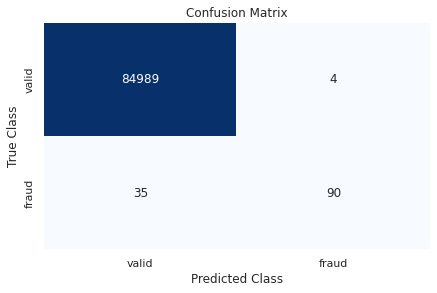

In [ ]:
class_names = ['valid', 'fraud']
matrix = confusion_matrix(valid_y, y_ann_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Isolation Forest and Local Outlier Factor Methods

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Get all the columns from the dataFrame
columns = df.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = df[columns]
Y = df[target]


In [ ]:

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [ ]:
# Fit the model
plt.figure(figsize=(9, 7))
num_outliers = len(Fraud)


for i, (name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        temp_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        temp_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    count_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(name, count_errors))
    print("Accuracy score: ", accuracy_score(Y, y_pred))
    print("Classification summmary: ", classification_report(Y, y_pred))
    print("The accuracy is", accuracy_score(Y, y_pred))
    print("The precision is", precision_score(Y, y_pred))
    print("The recall is", recall_score(Y, y_pred))
    print("The F1 score is", f1_score(Y, y_pred))

Isolation Forest: 668
Accuracy score:  0.9976456158406349
Classification summmary:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.30      0.31      0.31       473

    accuracy                           1.00    283726
   macro avg       0.65      0.66      0.65    283726
weighted avg       1.00      1.00      1.00    283726

The accuracy is 0.9976456158406349
The precision is 0.3014256619144603
The recall is 0.3128964059196617
The F1 score is 0.3070539419087137
Local Outlier Factor: 924
Accuracy score:  0.9967433368813574
Classification summmary:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.04      0.04      0.04       473

    accuracy                           1.00    283726
   macro avg       0.52      0.52      0.52    283726
weighted avg       1.00      1.00      1.00    283726

The accuracy is 0.9967433368813574


<Figure size 648x504 with 0 Axes>

Model Comparison

In [ ]:
model_comparison={}
model_comparison['LogisticRegression']=[accuracy_score(valid_y, log_pred), precision_score(valid_y, log_pred), 
                                        recall_score(valid_y, log_pred),f1_score(valid_y, log_pred)]

model_comparison['RandomForest']=[accuracy_score(valid_y, random_pred), precision_score(valid_y, random_pred), 
                                  recall_score(valid_y, random_pred),f1_score(valid_y, random_pred)]

model_comparison['XGBoost']=[accuracy_score(valid_y, xgb_preds), precision_score(valid_y, xgb_preds), 
                             recall_score(valid_y, xgb_preds),f1_score(valid_y, xgb_preds)]

model_comparison['KNN']=[accuracy_score(valid_y, knn_pred), precision_score(valid_y, knn_pred), 
                         recall_score(valid_y, knn_pred),f1_score(valid_y, knn_pred)]

model_comparison['ArtficialNeuralNetwork']=[accuracy_score(valid_y, y_ann_pred), precision_score(valid_y, y_ann_pred), 
                                            recall_score(valid_y, y_ann_pred),f1_score(valid_y, y_ann_pred)]

#model_comparison['IsolationForest']=[accuracy_score(), precision_score(), 
                                     #recall_score(),f1_score()]

#model_comparison['LocalOutlierFactor']=[accuracy_score(), precision_score(), 
                                       # recall_score(),f1_score()]







In [ ]:
model_compare_df = pd.DataFrame(model_comparison).T
model_compare_df.columns = ['Model Accuracy','Precision','Recall ','Model F1-Score']
model_compare_df = model_compare_df.sort_values(by='Model F1-Score',ascending=False)
model_compare_df.style.format("{:.2%}").background_gradient(cmap='Reds')

,Model Accuracy,Precision,Recall,Model F1-Score
ArtficialNeuralNetwork,99.95%,95.74%,72.00%,82.19%
XGBoost,99.95%,92.00%,73.60%,81.78%
RandomForest,99.95%,95.70%,71.20%,81.65%
LogisticRegression,99.91%,78.05%,51.20%,61.84%
KNN,99.85%,100.00%,0.80%,1.59%
